# REQUIRED LIBRARIES

In [24]:
import numpy as np
import pandas as pd
import sklearn
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import rmsprop
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import utils
from sklearn.model_selection import KFold

# Load Sonar data (R=rock, or m=mine)

In [25]:
sonar=pd.read_csv('sonar.csv')
sonar.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


# shuffle data

In [26]:
#ss=sonar.iloc[np.random.permutation(len(sonar))] #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
                                                            # see upper link                
ss = sklearn.utils.shuffle(sonar)    


# prepare data

In [46]:
 train, validate, test = np.split(ss.sample(frac=1), [int(.7*len(ss)), int(0.8*len(ss))])
print('train shape:',train.shape)
print('validate:',validate.shape)
print('test shape:',test.shape)
print('data shape:',ss.shape)
X_train = train.iloc[:,0:-1].values
y_train= train.iloc[:,-1].values
encoder =  LabelEncoder()
y_train= encoder.fit_transform(y_train)
Y_train = pd.get_dummies(y_train).values
##########################
X_test = test.iloc[:,0:-1].values
y_test= test.iloc[:,-1].values
encoder =  LabelEncoder()
y_test= encoder.fit_transform(y_test)
Y_test = pd.get_dummies(y_test).values
##########################
X_validate = validate.iloc[:,0:-1].values
y_validate= validate.iloc[:,-1].values
encoder =  LabelEncoder()
y_validate= encoder.fit_transform(y_validate)
Y_validate = pd.get_dummies(y_validate).values
##############################




train shape: (144, 61)
validate: (21, 61)
test shape: (42, 61)
data shape: (207, 61)


In [52]:
model = Sequential()
model.add(Dense(16,input_shape=(60,), activation='relu') )
model.add(Dense(16,activation='relu')) 
model.add(Dense(2,activation='sigmoid')) 
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#model.compile(Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),'binary_crossentropy', ['accuracy'])
# model.summary()

In [53]:
history=model.fit(X_train, Y_train, epochs=10,batch_size=1,validation_data=(X_validate,Y_validate))


Train on 144 samples, validate on 21 samples
Epoch 1/10
144/144 [==============================] - 1s 8ms/step - loss: 0.6916 - accuracy: 0.4931 - val_loss: 0.6914 - val_accuracy: 0.5476
Epoch 2/10
144/144 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.5972 - val_loss: 0.6650 - val_accuracy: 0.5714
Epoch 3/10
144/144 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.5903 - val_loss: 0.6505 - val_accuracy: 0.7143
Epoch 4/10
144/144 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.6944 - val_loss: 0.6262 - val_accuracy: 0.7619
Epoch 5/10
144/144 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6910 - val_loss: 0.6010 - val_accuracy: 0.7381
Epoch 6/10
144/144 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7083 - val_loss: 0.5927 - val_accuracy: 0.7619
Epoch 7/10
144/144 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7326 - v

In [54]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('test_acc:', test_acc)
print('test_loss:',test_loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('train_acc:', np.mean(acc) )
print('val_acc:',np.mean(val_acc))
history_dict=history.history
# DF=pd.DataFrame(history_dict)
# DF
#export_csv = DF.to_csv (r'C:\Users\Muhammad hamza\Desktop\export_dataframe.csv', index = None, header=True)

42/42 [==============================] - 0s 234us/step
test_acc: 0.8809523582458496
test_loss: 0.5059044673329308
train_acc: 0.67743057
val_acc: 0.7095238208770752


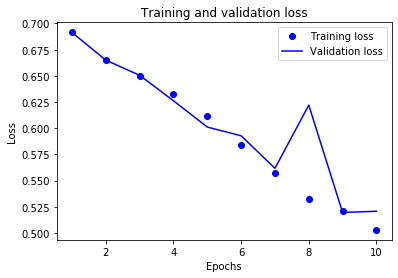

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

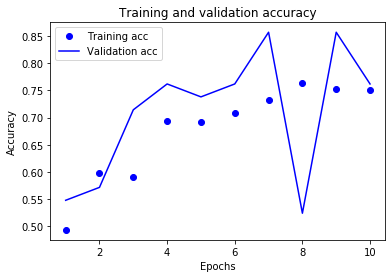

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()